In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px
import itertools
import warnings
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')

C:\Users\57321\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv(r'siniestros_con_hipotesis.csv', index_col=0)

In [4]:
df['FECHA'] = pd.to_datetime(df['FECHA'])
df.head()

,CODIGO_SINIESTRO,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE_CON,OBJETO_FIJO,DIRECCION,TOTAL_MUERTOS,TOTAL_HERIDOS,...,DESCRIPCION2,CODIGO_CAUSA3,DESCRIPCION3,CODIGO_CAUSA4,DESCRIPCION4,Hora,Dia,Mes,ILESOS,ANO
0,4401423,2015-01-01,09:45:00,Con Heridos,Choque,Vehiculo,NaN,CL 66A-KR 76 02,0,2,...,NaN,NaN,NaN,NaN,NaN,9,3,1,0.0,2015
1,4401425,2015-01-01,13:25:00,Solo Daños,Choque,Vehiculo,NaN,CL 143A-KR 142 02,0,0,...,EMBRIAGUEZ O DROGA,NaN,NaN,NaN,NaN,13,3,1,3.0,2015
2,4401430,2015-01-01,07:15:00,Con Heridos,Volcamiento,NaN,NaN,KR 19D-CL 62 S 02,0,1,...,NaN,NaN,NaN,NaN,NaN,7,3,1,0.0,2015
3,4401433,2015-01-01,20:30:00,Solo Daños,Choque,Vehiculo,NaN,AK 7-CL 43 33,0,0,...,NaN,NaN,NaN,NaN,NaN,20,3,1,2.0,2015
4,4401437,2015-01-01,12:50:00,Solo Daños,Choque,Vehiculo,NaN,DG 77A-AK 18D 02,0,0,...,ADELANTAR INVADIENDO VIA,NaN,NaN,NaN,NaN,12,3,1,2.0,2015


In [5]:
siniestros = pd.DataFrame(df.groupby('FECHA')['CODIGO_SINIESTRO'].count().reset_index(name='Cantidad_siniestros'))

In [6]:
siniestros = siniestros.sort_values(by=['FECHA'])
siniestros.tail()

,FECHA,Cantidad_siniestros
1821,2019-12-27,83
1822,2019-12-28,63
1823,2019-12-29,50
1824,2019-12-30,79
1825,2019-12-31,63


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


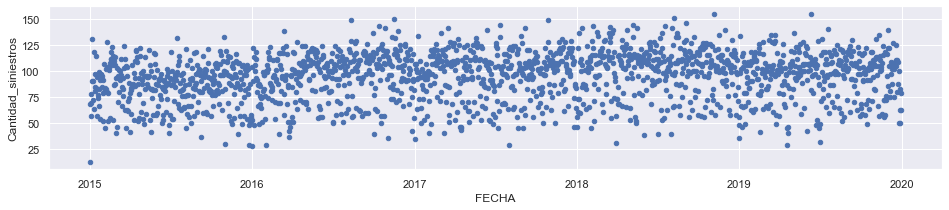

In [7]:
sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(16,3)})
ax = siniestros.plot(kind='scatter', x='FECHA', y='Cantidad_siniestros')


In [8]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [9]:
accidentes = pd.DataFrame(siniestros.set_index('FECHA'))
accidentes

,Cantidad_siniestros
FECHA,
2015-01-01,13
2015-01-02,68
2015-01-03,69
2015-01-04,78
2015-01-05,57
...,...
2019-12-27,83
2019-12-28,63
2019-12-29,50


In [11]:
y = pd.Series(accidentes['Cantidad_siniestros'].resample('W').mean())
y.head()

FECHA
2015-01-04    57.000000
2015-01-11    88.857143
2015-01-18    87.428571
2015-01-25    77.857143
2015-02-01    85.000000
Freq: W-SUN, Name: Cantidad_siniestros, dtype: float64

In [12]:
len(y)

262

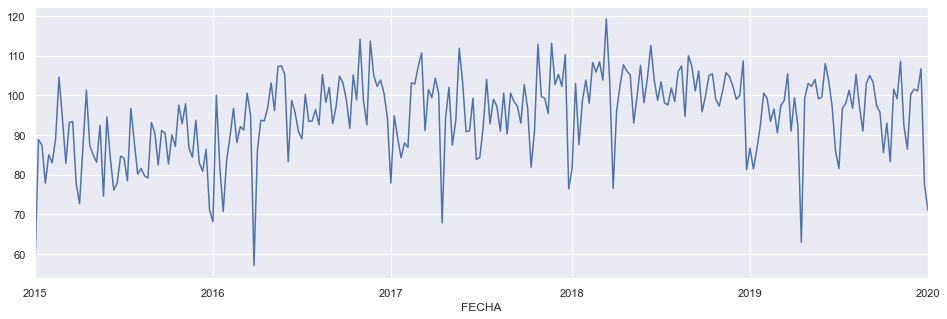

In [13]:
y.plot(figsize=(16, 5))
plt.show()

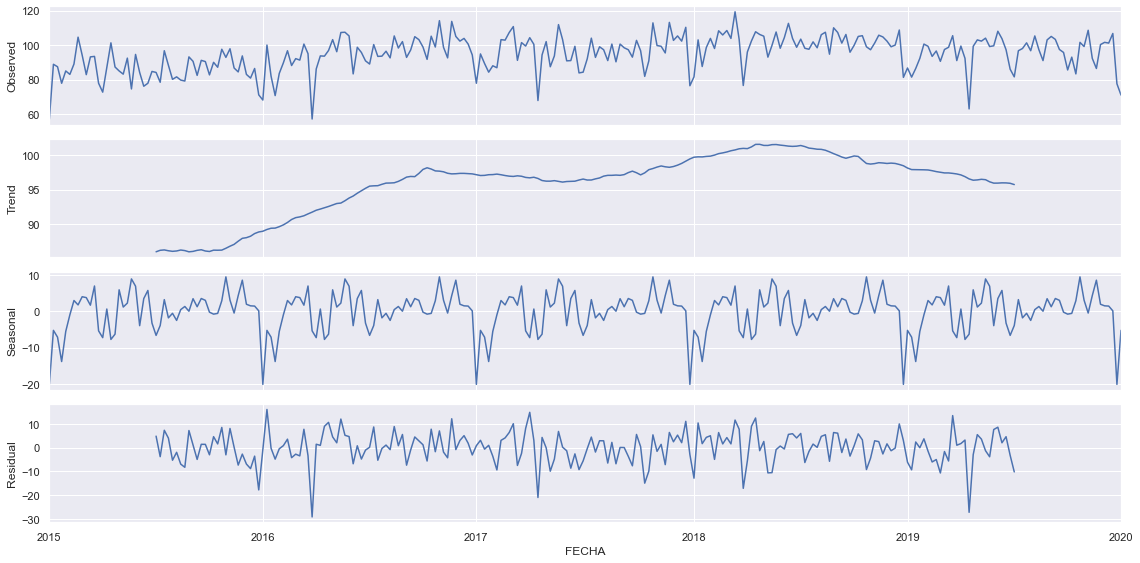

In [18]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 16, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

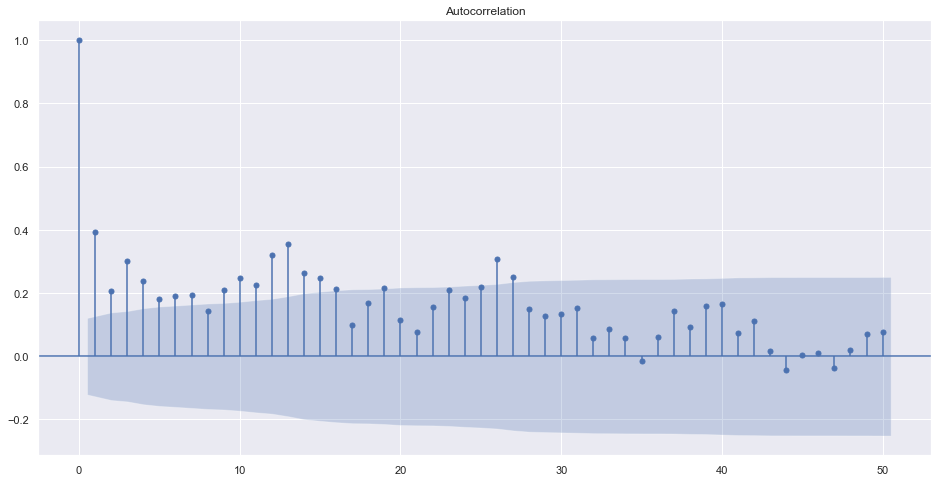

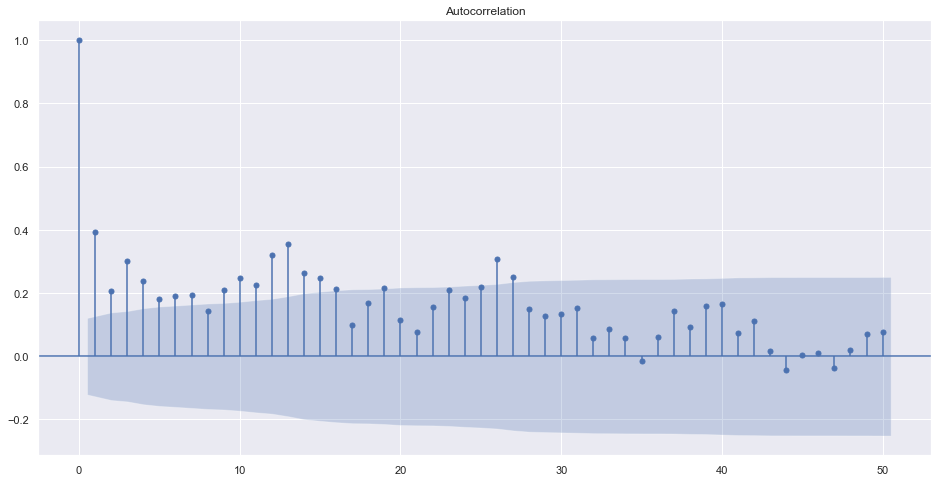

In [24]:
plot_acf(y, lags = 50, ax = plt.gca())

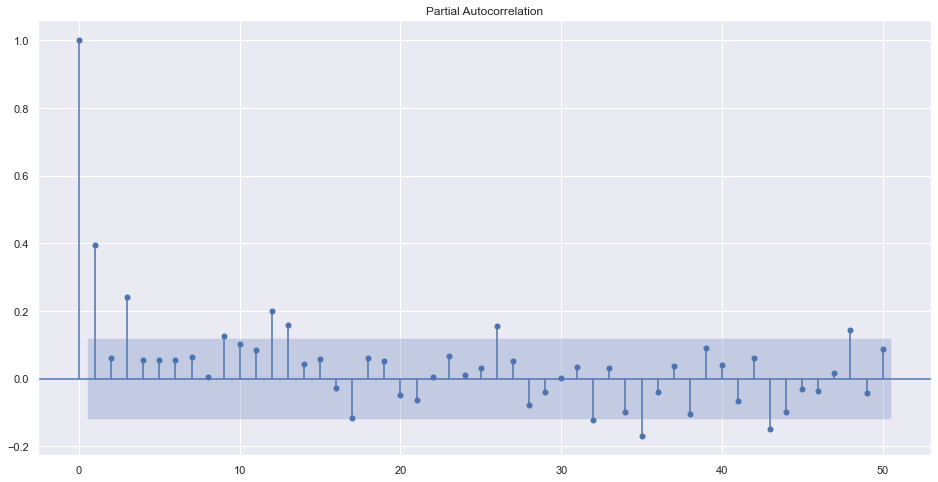

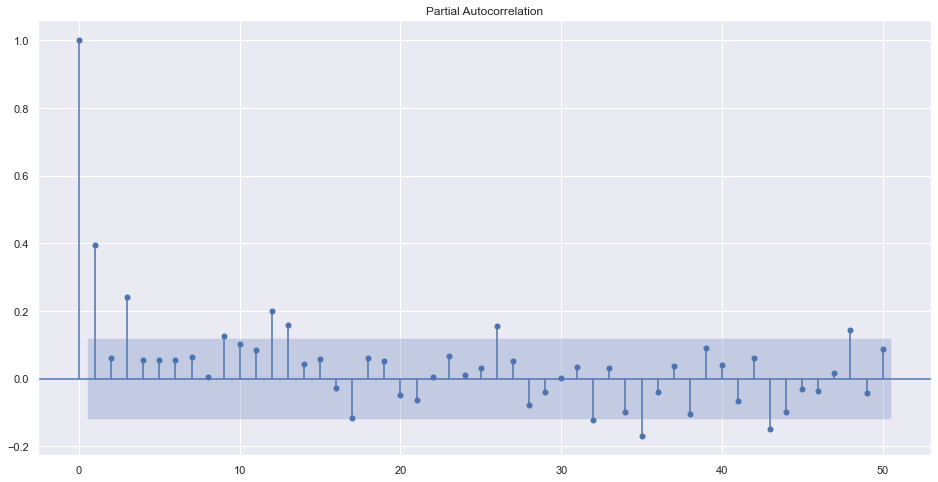

In [25]:
plot_pacf(y, lags = 50, ax = plt.gca())

In [26]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [27]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3122.698589184982
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2711.934555371691
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1925.6057775331892
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1770.7849020037502
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1937.3775919107866
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1863.8375947269624
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1799.6440502408673
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1772.7644834668126
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2794.2216228993243
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2456.7960170930346
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1910.30639269713
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1742.306075764271
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1931.653093774641
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1831.0900535785672
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1790.2073997015993
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1744.2877335983146
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1977.482280930862
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1890.2122356943478

In [33]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0976      0.366     -0.267      0.790      -0.814       0.619
ma.L1         -0.6247      0.243     -2.573      0.010      -1.101      -0.149
ar.S.L12      -0.6109      0.200     -3.061      0.002      -1.002      -0.220
sigma2        21.4752      6.960      3.086      0.002       7.834      35.116


In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                Cantidad_siniestros   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -100.481
Date:                            Mon, 09 Nov 2020   AIC                            208.962
Time:                                    18:00:44   BIC                            215.067
Sample:                                01-01-2015   HQIC                           211.044
                                     - 12-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0976      0.366     -0.267      0.790      -0.814       0.619
ma.L1         -0.6247      0.243     -2.573      0.010      -1.101      -0.149
ar.S.L12      -0.6109      0.200     -3.061      0.002      -1.002      -0.220
sigma2        21.4752      6.960      3.086      0.002       7.834      35.116
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.34
Prob(Q):                               nan   Prob(JB):                         0.84
Heteroskedasticity (H):               0.62   Skew:                             0.24
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

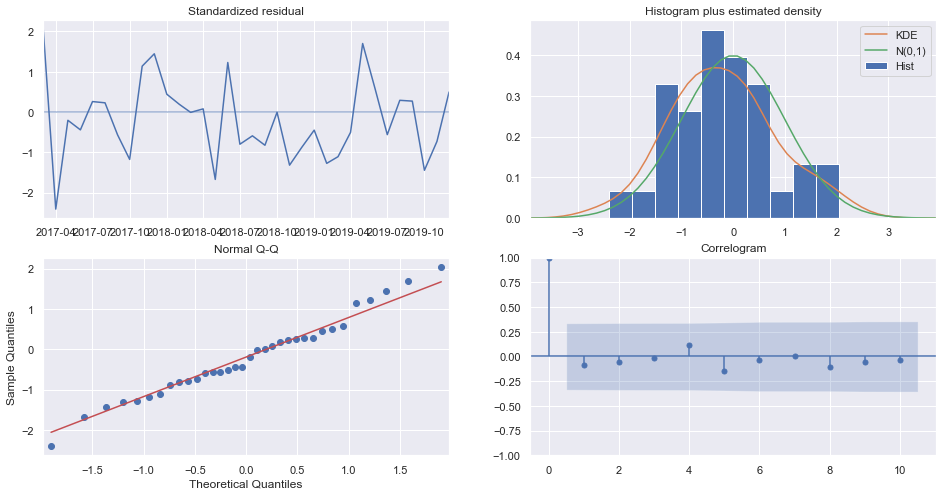

In [35]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

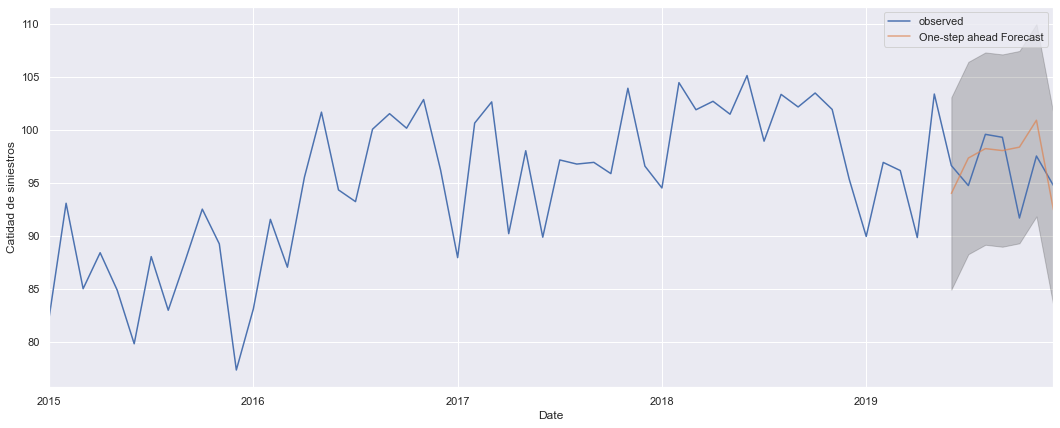

In [36]:
pred = results.get_prediction(start=pd.to_datetime('2019-06-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(18, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Catidad de siniestros')
plt.legend()
plt.show()

In [37]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-06-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 11.23


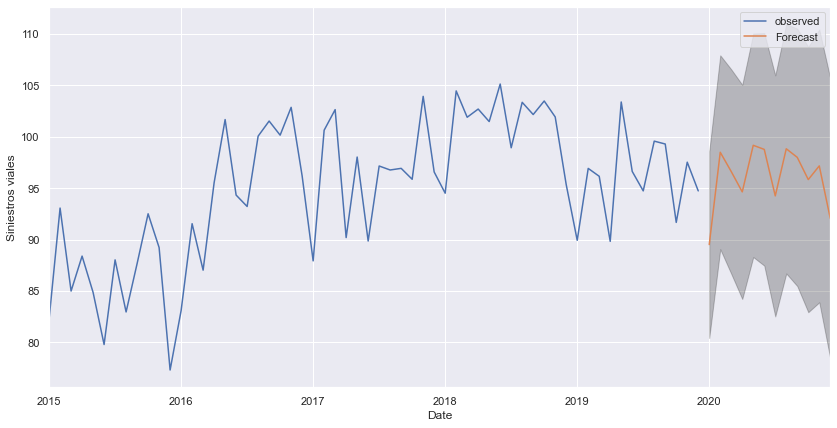

In [38]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Siniestros viales')
plt.legend()
plt.show()

In [39]:
pred_uc.predicted_mean

2020-01-01    89.520145
2020-02-01    98.499251
2020-03-01    96.618494
2020-04-01    94.644823
2020-05-01    99.175355
2020-06-01    98.777034
2020-07-01    94.254784
2020-08-01    98.837306
2020-09-01    98.002244
2020-10-01    95.841061
2020-11-01    97.172305
2020-12-01    92.067335
Freq: MS, dtype: float64

In [40]:
pred_ci

,lower Cantidad_siniestros,upper Cantidad_siniestros
2020-01-01,80.437400,98.602891
2020-02-01,89.072724,107.925778
2020-03-01,86.675531,106.561458
2020-04-01,84.229724,105.059922
2020-05-01,88.306873,110.043837
2020-06-01,87.473503,110.080566
2020-07-01,82.532322,105.977246
2020-08-01,86.710379,110.964233
2020-09-01,85.483914,110.520575
2020-10-01,82.943198,108.738923
